In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv")

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
50406,Zimbabwe,2020,ZWE,15526887.0,2.317871e+10,0.496,0.032,8.491,-1.776,-17.298,...,NaN,0.106,0.001,0.001,0.002,0.0,24.146,14.463,1.991,23.450
50407,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.542,0.034,10.223,1.732,20.398,...,NaN,0.105,0.001,0.001,0.002,0.0,27.907,16.408,2.137,20.899
50408,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.387,0.024,12.232,2.009,19.653,...,NaN,0.104,0.001,0.001,0.002,0.0,29.917,18.830,1.380,11.283
50409,Zimbabwe,2023,ZWE,16340829.0,NaN,0.387,0.024,13.443,1.211,9.904,...,NaN,0.103,0.001,0.001,0.002,0.0,31.029,20.318,1.876,13.957
50410,Zimbabwe,2024,ZWE,16634366.0,NaN,0.387,0.023,13.701,0.258,1.918,...,NaN,0.102,0.001,0.001,0.002,0.0,31.066,20.773,NaN,NaN


In [8]:
df.shape

(50411, 79)

In [9]:
df.columns[:10]

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct'],
      dtype='object')

In [10]:
india = df[df["country"] == "India"].copy()



In [11]:
cols =[
    "year",
    "co2",
    "co2_per_capita",
    "population",
    "gdp",
    "primary_energy_consumption"
    
]


In [12]:
india = india[cols]

In [13]:
india.isna().sum()


year                            0
co2                            19
co2_per_capita                 19
population                      0
gdp                            32
primary_energy_consumption    115
dtype: int64

In [72]:
india = india.dropna(subset= ["co2","gdp"])

In [73]:
india.isna().sum()


year                           0
co2                            0
co2_per_capita                 0
population                     0
gdp                            0
primary_energy_consumption    82
dtype: int64

In [74]:
# line plot

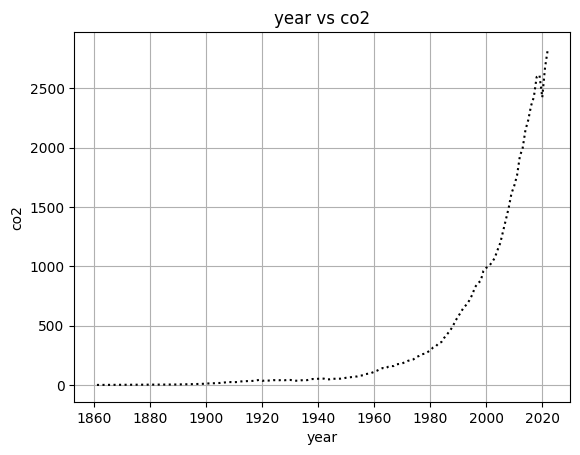

In [75]:
plt.figure()
plt.plot(india["year"],india["co2"],color = "black",linestyle =":")
plt.grid()
plt.xlabel("year")
plt.ylabel("co2")
plt.title("year vs co2")
plt.show()

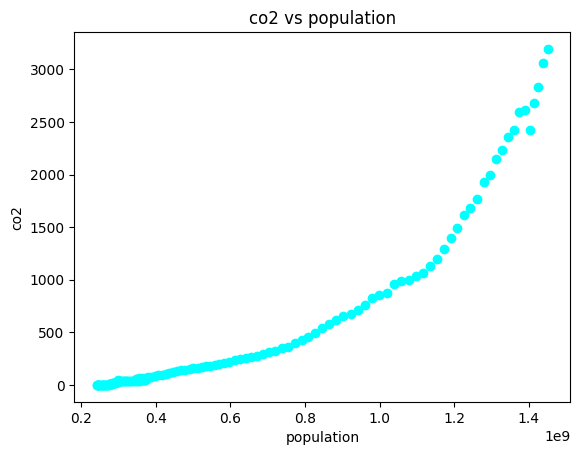

In [17]:
plt.scatter(india["population"],india["co2"],color= "cyan")
plt.xlabel("population")
plt.ylabel("co2")
plt.title("co2 vs population")
plt.show()

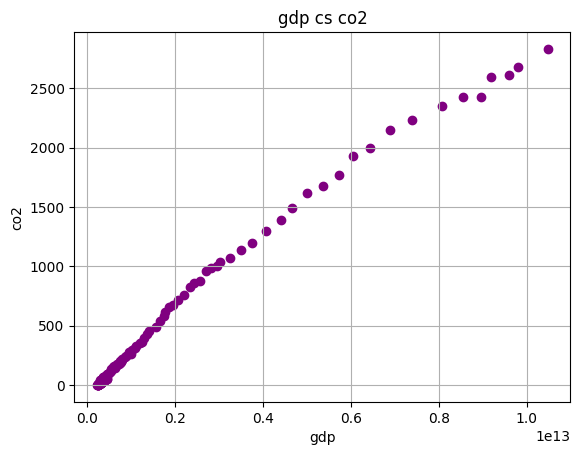

In [18]:
plt.scatter(india["gdp"],india["co2"],color ="purple")
plt.xlabel("gdp")
plt.ylabel("co2")
plt.title("gdp cs co2")
plt.grid()
plt.show()

In [19]:
correlation_value = india['gdp'].corr(india['co2'])

print(f"\nCorrelation between ColumnA and ColumnB: {correlation_value}")


Correlation between ColumnA and ColumnB: 0.9938439478287334


*When GDP increases, CO₂ emissions almost always increase as well, in a very consistent manner.*

In [20]:
usa = df[df["country"] == "United States"].copy()

In [21]:
usa = usa[cols]

In [22]:
usa.isna().sum()

year                            0
co2                             0
co2_per_capita                  0
population                      0
gdp                            22
primary_energy_consumption    165
dtype: int64

In [23]:
usa =usa.dropna(subset=["gdp"])

In [24]:
usa.isna().sum()

year                            0
co2                             0
co2_per_capita                  0
population                      0
gdp                             0
primary_energy_consumption    145
dtype: int64

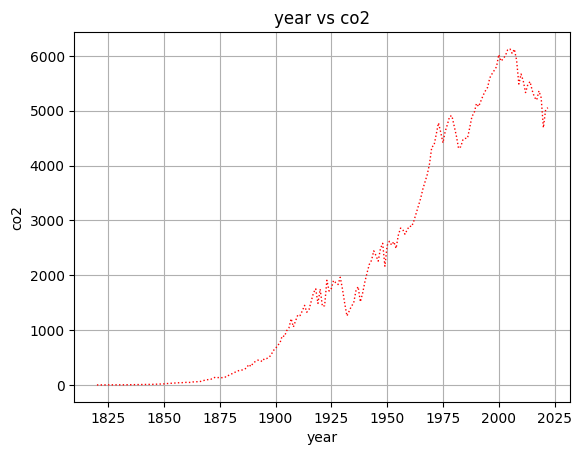

In [25]:
plt.figure()
plt.plot(usa["year"],usa["co2"],color = "red",linewidth=1,linestyle=":")
plt.xlabel("year")
plt.ylabel("co2")
plt.title("year vs co2")
plt.grid()
plt.show()

Text(0.5, 1.0, 'population vs co2')

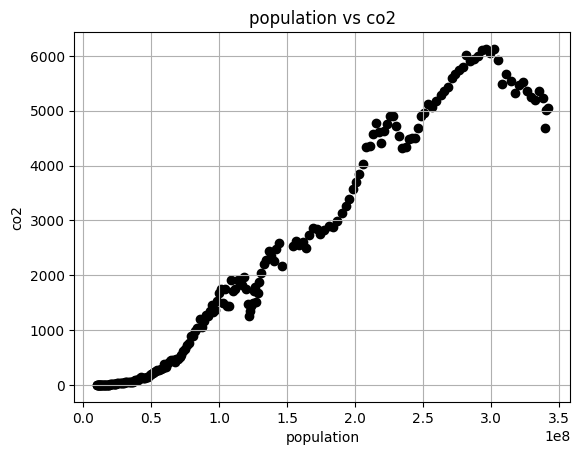

In [26]:
plt.scatter(usa["population"],usa["co2"],color ="black")
plt.grid()
plt.xlabel("population")
plt.ylabel("co2")
plt.title("population vs co2")

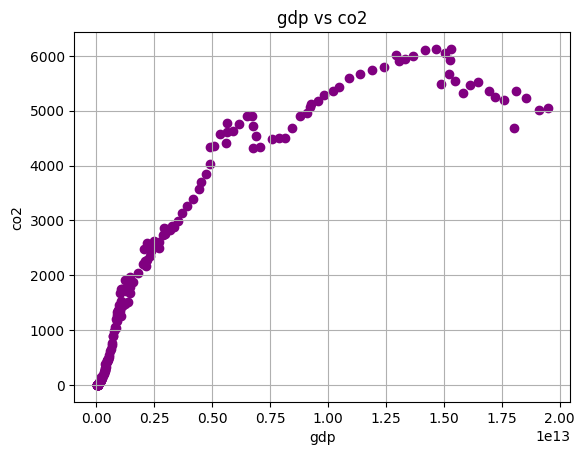

In [27]:
plt.scatter(usa["gdp"],usa["co2"],color ="purple")
plt.grid()
plt.xlabel("gdp")
plt.ylabel("co2")
plt.title("gdp vs co2")
plt.show()

In [28]:
correlation_value = usa['gdp'].corr(usa['co2'])

print(f"\nCorrelation between ColumnA and ColumnB: {correlation_value}")


Correlation between ColumnA and ColumnB: 0.897782091765562


In [29]:
china = df[df["country"]== "China"].copy()

In [30]:
china = china[cols]

In [31]:
china.isna().sum()

year                            0
co2                            57
co2_per_capita                 57
population                      0
gdp                            85
primary_energy_consumption    115
dtype: int64

In [32]:
china=china.dropna(subset =["co2","gdp"])

In [33]:
china.isna().sum()

year                           0
co2                            0
co2_per_capita                 0
population                     0
gdp                            0
primary_energy_consumption    27
dtype: int64

In [34]:
# If 1990 is missing, use the value from 1989
china_ffill = china.ffill()

In [35]:
china.isna().sum()

year                           0
co2                            0
co2_per_capita                 0
population                     0
gdp                            0
primary_energy_consumption    27
dtype: int64

In [36]:
 #line plot

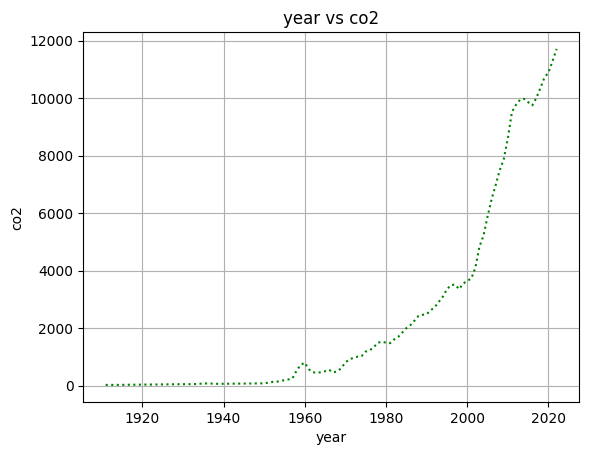

In [37]:
plt.figure()
plt.plot(china["year"],china["co2"],color="green",linestyle=":")
plt.xlabel("year")
plt.ylabel("co2")
plt.title("year vs co2")
plt.grid()
plt.show()

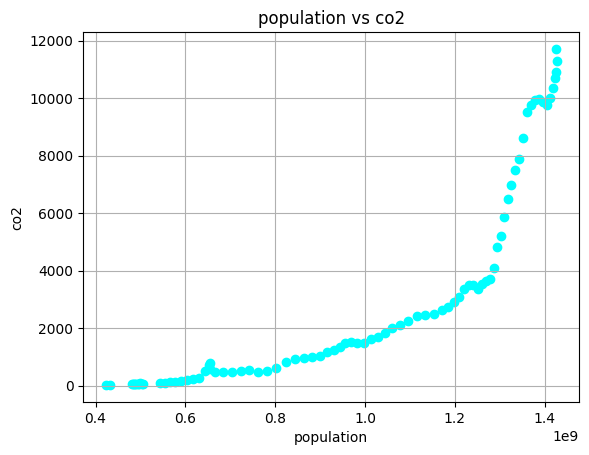

In [38]:
plt.scatter(china["population"],china["co2"],color="cyan")
plt.xlabel("population")
plt.ylabel("co2")
plt.title("population vs co2")
plt.grid()
plt.show()

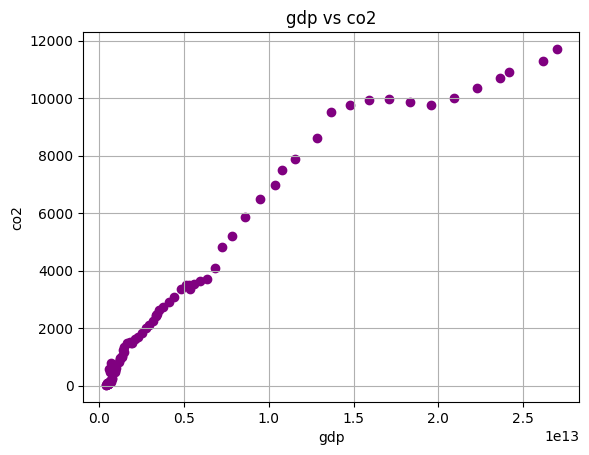

In [39]:
plt.scatter(china["gdp"],china["co2"],color="purple")
plt.xlabel("gdp")
plt.ylabel("co2")
plt.title("gdp vs co2")
plt.grid()
plt.show()

In [40]:
correlation_value = china['gdp'].corr(china['co2'])


print(f"\nCorrelation between ColumnA and ColumnB: {correlation_value}")


Correlation between ColumnA and ColumnB: 0.9734611715105999


In [41]:
india['year'].min(),india['year'].max()
usa['year'].min(),usa['year'].max()
china['year'].min(),china['year'].max()


(np.int64(1911), np.int64(2022))

In [42]:
start_year =1911
end_year = 2022
india_f =india[(india['year']>=start_year)&(india['year']<=end_year)]
usa_f =usa[(usa['year']>=start_year)&(usa['year']<=end_year)]
china_f =china[(china['year']>=start_year)&(china['year']<=end_year)]

In [43]:
cols = ['year', 'co2']

india_f = india_f[cols]

usa_f   = usa_f[cols]
china_f = china_f[cols]

In [44]:
india_f.shape
usa_f.shape
china_f.shape

(85, 2)

In [45]:
india_f.head()

,year,co2
21649,1911,24.782
21650,1912,28.521
21651,1913,31.466
21652,1914,31.698
21653,1915,33.141


In [46]:
usa_f.head()

,year,co2
47894,1911,1265.776
47895,1912,1351.018
47896,1913,1450.855
47897,1914,1325.944
47898,1915,1375.452


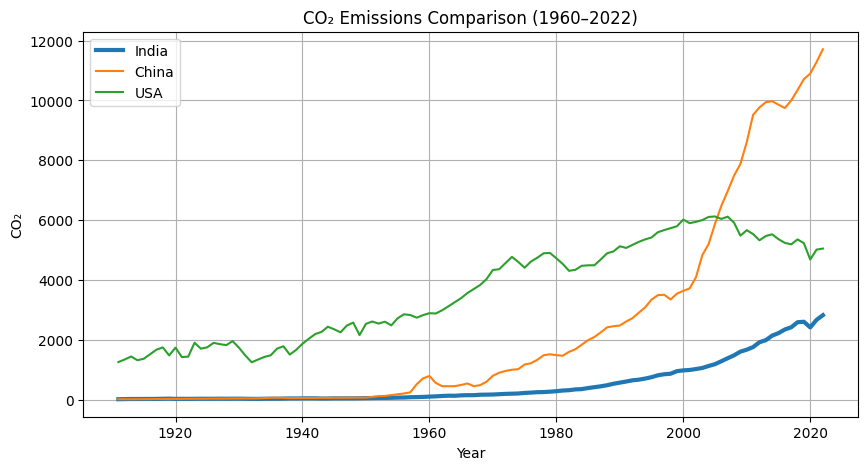

In [52]:
plt.figure(figsize=(10,5))
plt.plot(india_f['year'], india_f['co2'], label='India',linewidth=3)
plt.plot(china_f['year'], china_f['co2'], label='China')
plt.plot(usa_f['year'], usa_f['co2'], label='USA')

plt.xlabel('Year')
plt.ylabel('CO₂')
plt.title('CO₂ Emissions Comparison (1960–2022)')
plt.legend()
plt.grid()
plt.show()


In [53]:
india_f.info()
china_f.info()
usa_f.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 21649 to 21760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    112 non-null    int64  
 1   co2     112 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 9820 to 9931
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    85 non-null     int64  
 1   co2     85 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 47894 to 48005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    112 non-null    int64  
 1   co2     112 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB


In [55]:
india_f.describe()

,year,co2
count,112.000000,112.000000
mean,1966.500000,531.352188
std,32.475632,742.914857
min,1911.000000,24.782000
25%,1938.750000,47.432250
50%,1966.500000,159.464000
75%,1994.250000,725.652250
max,2022.000000,2831.132000


In [56]:
china_f.describe()

,year,co2
count,85.000000,85.000000
mean,1978.082353,3047.994365
std,27.963076,3550.491577
min,1911.000000,24.252000
25%,1959.000000,459.625000
50%,1980.000000,1494.298000
75%,2001.000000,3724.114000
max,2022.000000,11711.808000


In [57]:
usa_f.describe()

,year,co2
count,112.000000,112.000000
mean,1966.500000,3610.255027
std,32.475632,1633.118205
min,1911.000000,1257.814000
25%,1938.750000,1908.287500
50%,1966.500000,3638.439000
75%,1994.250000,5143.513250
max,2022.000000,6126.903000


In [87]:
start, end = 1911, 2022

india_pc = india_f[(india_f['year'] >= start) & (india_f['year'] <= end)].copy()
usa_pc   = usa_f[(usa_f['year'] >= start) & (usa_f['year'] <= end)].copy()
china_pc = china_f[(china_f['year'] >= start) & (china_f['year'] <= end)].copy()

In [88]:
india_f.columns
china_f.columns
usa_f.columns


Index(['year', 'co2', 'index'], dtype='object')